### 1. Author
Student Name: Pranjali Hande

Student ID: 220707639

### 2. Problem formulation

<b>Problem Statement: The problem is to predict whether the audio segment has been recorded indoors or outdoors.</b>

Using the MLEnd Sound dataset, perform the predictions of whether the sound segment has been recorded indoors or outdoors. 

The MLEnd dataset is collected from different locations in London. These locations are categorized into indoors or outdoors, but it’s interesting to know how the classifier will be able to differentiate them, as not all indoor locations have the same features (For E.g., some indoors are very quiet such as National Gallery vs some are very noisy such as Waterloo Station) and same for outdoors (Some locations are quite verses many of them are noisy).

### 3. Machine Learning pipeline

Describe your ML pipeline. Clearly identify its input and output, any intermediate stages (for instance, transformation -> models), and intermediate data moving from one stage to the next. It's up to you to decide which stages to include in your pipeline.
Stages of Machine Learning Pipeline:

<b> Input:</b> Audio files from MLE sound dataset (.wav files: It captures the closest mathematical representation of the original audio with no noticeable audio quality loss).

<b> Output:</b> Lable either Central, Eastern, or Western areas of London.

<b> Stage 1. Preprocess:</b> Collect the MLEnd Audio dataset samples (almost 2491). These Audio files are processed and transformed using python package Librosa. 

<b> Stage 2. Feature Extraction:</b> Several advanced features can be extracted and visualized using this library to these analyze signals. List multiple audio features as a predictors for the classifier and label are either Central, Eastern, or Western areas of London.

<b> Stage 3. Modelling:</b> 

   A. Normalize the input data (extracted features as predictors).
    
   B. Split the data into Train and test samples.
    
   C. Train classifer with train data.
    
   D. Predict labels for audio test data as indoors or outdoors from trained classifer.

<b> Stage 4. Validate Accuracy:</b> Compute Accuracy for the predictions. Perform Validation on Test dataset.

### 4. Transformation stage

Describe any transformations, such as feature extraction. Identify input and output. Explain why you have chosen this transformation stage.

This is the first stage in ML pipeline, where the input audio signals are processed and transformed. In this project we are using Librosa python package to transformed the audio data. There are several features that can be extracted using this library which can be used as a predictors to train a classifier. 

<b> In this stage, Audio signals are input and the extred features are output. </b> 

Below are some of the features which can be extrated from audio files.

<b> 1. chroma_stft:</b> Chroma feature provides visualization on how dominant the characteristics of a certain pitch presentated in sampled frame. 

   This feature can help to identify audio signals with harmonic and melodic characteristics such as water sound.

<b> 2. The spectral centroid: </b> It's the frequency based feature. It indicates the frequency at which the energy of the audio signal is centered. Spectral_centroid computes the spectral centroid for each frame in a the given signal. This is bacially a central tendency of the signal.

<b> 3. Spectral Bandwidth: </b> It's gives the difference between the upper and lower frequencies in audio signals. The sum of maximum deviation of the signal on both sides of the point is the bandwidth of the signal at that time frame.

As we are using Spectral Bandwidth and spectral centroid, this will help to cover the whole range of audio signal.

<b> 4. Zero Crossing Rate: </b> Zero-crossing rate is a measure of number of times in a given time interval/frame that the amplitude of the speech signals passes through a value of zero. This feature can be used in multiple audio domainn, in this problem it will be useful for environmental sound recognition. 

   The simplest method to distinguish between voiced and unvoiced speech is to analyze the zero crossing rate. So adding this as one of the predictor will help to distnguished the dataset.

    
<b> 5. Mel-Frequency Cepstral Coefficients(MFCCs): </b> MFCC is most widley used for machine learning experiment involving audio files. These are the small set of features which concisely describe the overall shape of a spectral envelope. MFCC's models the characteristics of the human voice. 

   This approximates the human auditory system’s response more closely. Hence, can be used as one the predictors.

### 5. Modelling
Describe the ML model(s) that you will build. Explain why you have chosen them.

In a multiclass classification, we train a classifier using training data and use classifier for classifying test data. There are many classifiers which can be used for classification such as:

1. Decision tree classifier
2. SVM (Support vector machine) classifier
3. KNN (k-nearest neighbors) classifier 
4. Random Forest Classifier

Out of them, as a part of this project will be using SVM as a classifier as it has the below advantages. All other classifiers are also tried and tested.

<b>SVM Classifiers:</b> Support Vectors Classifier tries to find the best hyperplane to separate the different classes by maximizing the distance between sample points and the hyperplane.

<b>1. High-Dimensional Data:</b>  SVM can handle High dimensional data. We are extracting many features from the audio signals which makes the database bigger and more complex.  Hence SVM will be helpful to use.

<b>2. Outliers have less influence in the SVM Algorithm:</b>  As outliers have less influence, there are fewer chances of skewing the results, as outliers affect the mean of the data. Thus, less influence of outliers will be helpful.

<b>3. Better Accuracy:</b> When comparing results with other classifiers, SVM provides better accuracy.

<b>4. Prevent Overfitting:</b> SVM generally does not suffer the condition of overfitting as it L2 Regularization feature which provides generalization capabilities that prevent overfitting.

<b>5. Handles non-linear data efficiently:</b> SVM can efficiently handle non-linear data using the Kernel trick. As our dataset is also non-linear it will help to get good predictions.




### 6. Methodology

Describe how you will train and validate your models, how model performance is assesssed (i.e. accuracy, confusion matrix, etc)

<b>1. Training a model:</b> As we have chose SVM as our model, we need to train SVM classifer in order to make predictions.
To train a classifier:

   A. We will use the extracted features as a predictors and Indoors/outdoors as a labels.
        
   B. These predictors and labels will be then divided into Train and Test data.
        
   C. SVM classifer will be train on training data and the validations will be performed on trained classfier using Test data.

    
<b>2. Validations:</b> Once predictions are made, to understand how our models works we can use below measures to understand the qualities of predictions:

   <b>A. Accuracy:</b> Computed by comparing the set of labels predicted to the corresponding set of actual labels.
    
   <b>B. Precision:</b> It's the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is the ability of the classifier not to label as positive a sample that is negative.
    
   <b>C. Recall:</b> The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.
    
   <b>D. F-Score:</b> The F1 score can be interpreted as a harmonic mean of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is: F1 = 2 * (precision * recall) / (precision + recall)
   
   <b>E. Confusion Matrix:</b> Compute confusion matrix to evaluate the accuracy of a classification. Thus in binary classification, it provides the count of true negatives, false negatives , true positives and false positives.


### Importing required modules

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob,csv
import IPython.display as ipd
from tqdm import tqdm
import librosa
from scipy.io import wavfile as wav
import librosa.display
import sklearn
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

### 7. Dataset
Describe the dataset that you will use to create your models and validate them. If you need to preprocess it, do it here. Include visualisations too. You can visualise raw data samples or extracted features.

For this project, we are using the MLEnd Sound Datasets. As the number of features to be used as predictors are 19, minimum number of samples reuqired are:

(19 * 19) + 19 = 380

Total 2491 audio samples are used which is greater than 380 to avoid overfitting.  Also with this, the CSV file with other details related to each audio file such as file ID, Area, Spot, IN-Out and Participent is loaded and used with sound dataset. Will verify the values associated with each category.


In [90]:
# Collecting audio signals

sample_path = './MLEndLS_all/*.wav'
files = glob.glob(sample_path)
print(f" Total audio files: {len(files)}")
print(f"\n First five files are: ")
for file in files[:5]:
    print(file.split('\\')[-1])

 Total audio files: 2491

 First five files are: 
0001.wav
0002.wav
0003.wav
0004.wav
0005.wav


In [91]:
# Get CSV file with data related to audio files:

MLENDLS_df = pd.read_csv('./MLEndLS.csv').set_index('file_id') 

display(MLENDLS_df) 


,area,spot,in_out,Participant
file_id,,,,
0001.wav,british,street,outdoor,S151
0002.wav,kensington,dinosaur,indoor,S127
0003.wav,campus,square,outdoor,S18
0004.wav,kensington,hintze,indoor,S179
0005.wav,campus,square,outdoor,S176
...,...,...,...,...
2496.wav,westend,trafalgar,outdoor,S151
2497.wav,campus,square,outdoor,S6
2498.wav,westend,national,indoor,S96


In [92]:
# Get values associated with each category
MLENDLS_df.nunique()

area             6
spot            32
in_out           2
Participant    176
dtype: int64

In [111]:
# Select Features to be exracted:

csv_header = 'filename chroma_stft spectral_centroid spectral_bandwidth zero_crossing_rate'
for i in range(1, 21):
    csv_header += f' mfcc{i}'
csv_header += ' label'
csv_header = csv_header.split()

print(f"Features to be extracted are: \n{csv_header}")

file = open('./dataset_basic.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(csv_header)


Features to be extracted are: 
['filename', 'chroma_stft', 'spectral_centroid', 'spectral_bandwidth', 'zero_crossing_rate', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19', 'mfcc20', 'label']


In [113]:
def get_MFCC(y, sr):
    mfccs = librosa.feature.mfcc(y=y, sr=sr)
    return mfccs

In [114]:
def get_rmse(y, sr):
    rmse = librosa.feature.rms(y=y)
    return np.mean(rmse)

In [115]:
def get_spectral_centroid(y, sr):
    spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
    return np.mean(spec_cent)

In [116]:
def get_spectral_bw(y, sr):
    spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    return np.mean(spec_bw)

In [117]:
def get_zcr(y):
    zcr = librosa.feature.zero_crossing_rate(y)
    return np.mean(zcr)

In [118]:
def get_chroma_stft(y, sr):
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    return np.mean(chroma_stft)

In [100]:
def get_predictors_labels(files,labels_file, scale_audio=False, onlySingleDigit=False):

    for file in tqdm(files):
        
        #Get File ID and Label
        fileID = file.split('\\')[-1]
        yi = labels_file.loc[fileID]['in_out']=='indoor'

        fs = None # if None, fs would be 22050
        y, sr = librosa.load(file,sr=fs)
        if scale_audio: y = y/np.max(np.abs(y))
            
        # Performing Feature Extraction
        chroma_stft = get_chroma_stft(y, sr)
        spec_cent = get_spectral_centroid(y, sr)
        spec_bw = get_spectral_bw(y, sr)
        zcr = get_zcr(y)
        mfcc = get_MFCC(y, sr)
        

        append_csv = f'{fileID} {chroma_stft} {spec_cent} {spec_bw} {zcr}' 
        for val in mfcc:
            append_csv += f' {np.mean(val)}'

        # Label for particular file ID
        append_csv += f' {yi}'
        
        # Uploading Extracted features and label to dataset.csv file
        file = open('./dataset_basic.csv', 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(append_csv.split())


In [101]:
get_predictors_labels(files, labels_file=MLENDLS_df, scale_audio=True, onlySingleDigit=True)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2491/2491 [17:58<00:00,  2.31it/s]


### 8. Results
Carry out your experiments here, explain your results.

In [102]:
# Read dataset file

data = pd.read_csv('./dataset_basic.csv')
display(data.head())

# Dropping unneccesary columns
data = data.drop(['filename'],axis=1)
label = data.iloc[:, -1]

# Encoding the Labels
encoder = LabelEncoder()
y = encoder.fit_transform(label)

# Scaling the Feature columns
scaler = StandardScaler()
X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))


,filename,chroma_stft,spectral_centroid,spectral_bandwidth,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,0001.wav,0.708509,2588.972447,3314.709725,0.045167,-126.706680,155.083603,-34.948479,47.673893,-3.847542,...,3.758498,0.000504,7.930458,-3.208773,-0.182821,7.767486,-8.277762,16.587343,-8.924481,False
1,0002.wav,0.483385,1477.982745,2163.027036,0.034102,-224.430389,193.501801,-11.608438,7.340798,1.813556,...,-1.414592,-9.788772,6.621476,-2.241543,-6.904031,7.761678,-5.318329,-0.468417,3.177372,True
2,0003.wav,0.633761,2256.564655,2738.490141,0.051183,-219.344849,164.443512,-39.512474,30.929867,-1.291407,...,-20.716301,24.640026,-6.354823,1.313619,16.861198,-14.994688,3.984087,0.984467,-7.551928,False
3,0004.wav,0.506248,2267.515325,3149.459464,0.052687,-138.645340,175.407730,-27.150810,4.292705,-2.949264,...,10.080770,-12.653316,2.355039,-3.125674,-3.332273,-7.480530,-2.681682,-6.538935,1.334394,True
4,0005.wav,0.599617,1731.772740,2055.022134,0.048458,-287.772675,178.267441,-30.019077,1.547611,1.808551,...,-0.010981,-3.924360,-1.596193,-3.904301,-4.679410,0.058560,-1.126085,-2.390474,-3.385034,False


In [103]:
# Dividing data into training and Testing set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1743, 24), (748, 24), (1743,), (748,))

In [104]:
# Training a classifier with Train data

model  = svm.SVC(C=1)
model.fit(X_train,y_train)

# Validation of trained classifier on Test Data
yt_p = model.predict(X_train)
yv_p = model.predict(X_test)

print('Training Accuracy', np.mean(yt_p==y_train))
print('Validation  Accuracy', np.mean(yv_p==y_test))
print('The support vectors are', model.support_vectors_.shape)

Training Accuracy 0.861732644865175
Validation  Accuracy 0.767379679144385
The support vectors are (1029, 24)


### Trying out some more classifiers

In [105]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train,y_train)

yt_p = clf.predict(X_train)
yv_p = clf.predict(X_test)


print('Training Accuracy', np.mean(yt_p==y_train))
print('Validation  Accuracy', np.mean(yv_p==y_test))
print('The support vectors are', model.support_vectors_.shape)

Training Accuracy 0.7561675272518646
Validation  Accuracy 0.7072192513368984
The support vectors are (1029, 24)


In [106]:
# Decision Tree Classifer

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
clf_dt = DecisionTreeClassifier(random_state=0)

clf_dt.fit(X_train,y_train)

yt_p_dc = clf_dt.predict(X_train)
yv_p_dc = clf_dt.predict(X_test)


print('Training Accuracy', np.mean(yt_p_dc==y_train))
print('Validation  Accuracy', np.mean(yv_p_dc==y_test))

Training Accuracy 1.0
Validation  Accuracy 0.6657754010695187


In [107]:
# KNeighbors Classifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7165775401069518


In [108]:
# Linear SVC Classifier

lin_clf = svm.LinearSVC()
lin_clf.fit(X_train,y_train)
yt_p_lin = lin_clf.predict(X_train)
yv_p_lin = lin_clf.predict(X_test)

print('Training Accuracy', np.mean(yt_p_lin==y_train))
print('Validation  Accuracy', np.mean(yv_p_lin==y_test))

Training Accuracy 0.7814113597246127
Validation  Accuracy 0.7486631016042781


C:\Users\pranj\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


<b> We have compared accuracy of multiple models such as Decision tree classifier, SVM (Support vector machine) classifier, KNN (k-nearest neighbors) classifier, and Random Forest Classifier. Out of all these, we can observe the best accuracy is provided by SVM classier. Also some classifiers such as decision tree are overfitting, which can be exclude. Hence SVM classifier is selected for further validations.</b>

[[267 127]
 [ 92 262]]


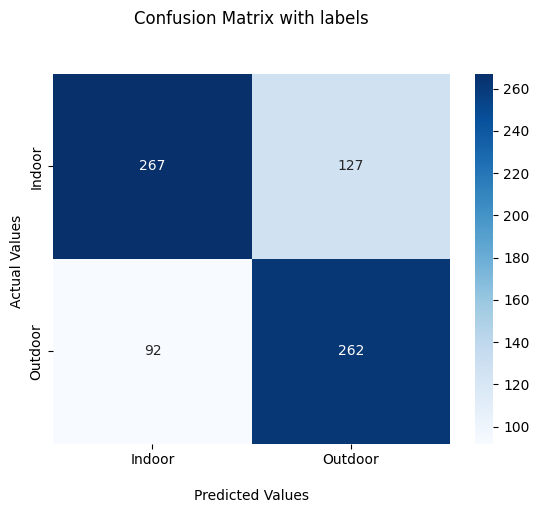

In [109]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

labels = ["Indoor", "Outdoor"]
cm = confusion_matrix(y_test, yv_p)
print(cm)

ax = sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')

ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

## Display the visualization of the Confusion Matrix.
plt.show()

In [110]:
precision, recall, fscore, _ = precision_recall_fscore_support(y_test, yv_p, average='weighted')
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F-score: {fscore}")

Precision: 0.710504513217958
Recall: 0.7072192513368984
F-score: 0.7073108305222048


### 9. Conclusions

With this project, we are successfully able to distinguish Indoor and Outdoor audio signals in London with 0.77 Accuracy. From the confusion matrix, we can observe, True Positive and True Negatives numbers(diagonally) are high than the rest. That means we have fewer False Positives and False Negatives.

But still, there is room for improvement in order to make the False Positives and False Negatives number as low as possible and thereby increase the Precision and F-score values. this can be achieved with a greater number of samples to train the classifier, clean data, select more suitable feature extractions and use deep learning classifiers which can provide good accuracy.
